# Data Science Workflow
- Plan
- Acquire
- Prepare Data (Data Wrangling)
- Explore
- Model
- Delivery/Present

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import numpy as np
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [3]:
# Acquire
df = pd.read_csv("lemonade.csv")

In [4]:
# Prepare
df["Revenue"] = df.Price * df.Sales
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(df['Date']) 
df = df.drop("Date", 1) # drop the old Date column
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Revenue
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,5.0
2017-01-02,Monday,28.9,1.33,15,0.5,13,6.5
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,7.5
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,8.5
2017-01-05,Thursday,42.4,1.00,33,0.5,18,9.0


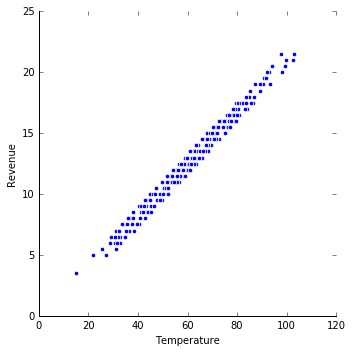

In [5]:
# Explore how Temperature relates to Revenue
sns.relplot(x='Temperature', y='Revenue', data=df) 

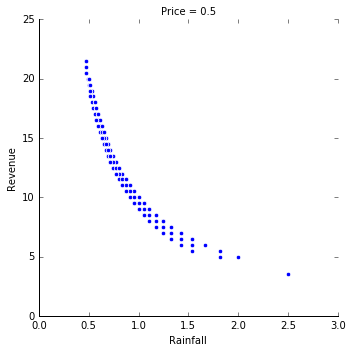

In [6]:
sns.relplot(x='Rainfall', y='Revenue', col='Price', data=df) # Looks like Rainfall is exponential, l

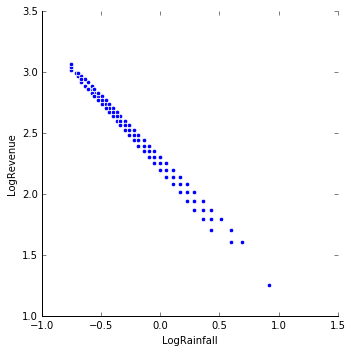

In [7]:
df["LogRainfall"] = df["Rainfall"].apply(np.log)
df["LogRevenue"] = df["Revenue"].apply(np.log)
sns.relplot(x='LogRainfall', y='LogRevenue', data=df) # Linear relationship between logRainfall and logRevenue

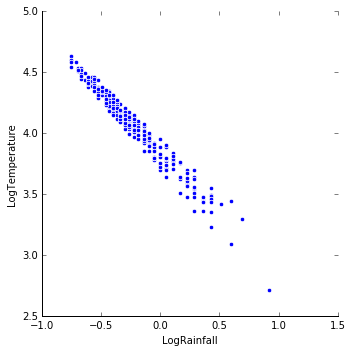

In [8]:
df["LogTemperature"] = df["Temperature"].apply(np.log)

sns.relplot(x='LogRainfall', y='LogTemperature', data=df)

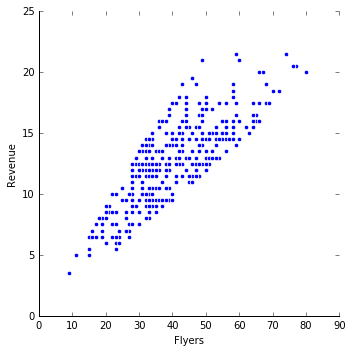

In [9]:
sns.relplot(x='Flyers', y='Revenue', data=df)

In [10]:
# Setup X and y values
X = df.drop(["Day", "Revenue", "Price"], axis=1)
y = df[["Revenue"]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=0)

In [12]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['Temperature', 'Rainfall', 'Flyers', 'Sales', 'LogRainfall', 'LogRevenue', 'LogTemperature', 'Revenue']
Train dimensions (rows, columns): (292, 8)


In [13]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['Temperature', 'Rainfall', 'Flyers', 'Sales', 'LogRainfall', 'LogRevenue', 'LogTemperature', 'Revenue']
Test dimensions (rows, columns): (73, 8)


In [14]:
# Validate that the splits are what we would expect.

if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


/Users/moon/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


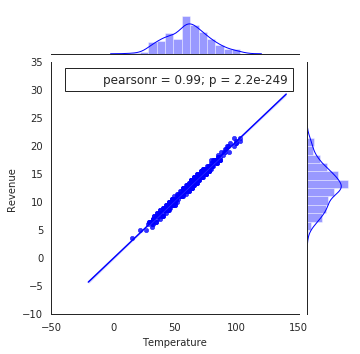

In [15]:
with sns.axes_style('white'):
    j = sns.jointplot("Temperature", "Revenue", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

/Users/moon/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


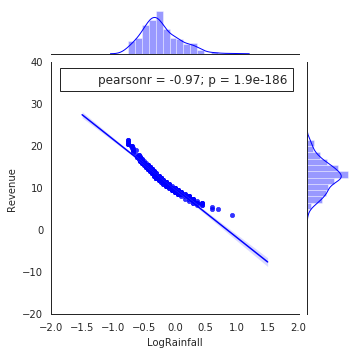

In [16]:
with sns.axes_style('white'):
    j = sns.jointplot("LogRainfall", "Revenue", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

/Users/moon/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


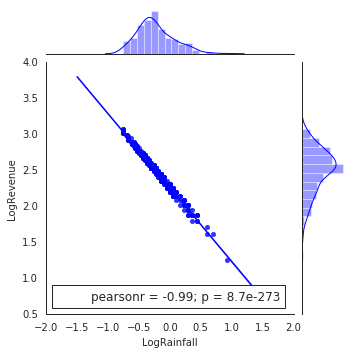

In [17]:
with sns.axes_style('white'):
    j = sns.jointplot("LogRainfall", "LogRevenue", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

/Users/moon/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


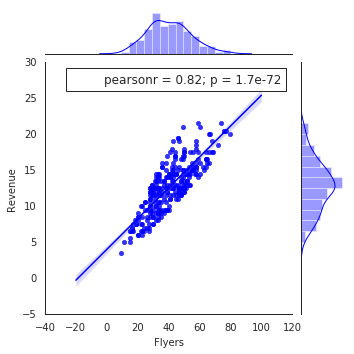

In [19]:
with sns.axes_style('white'):
    j = sns.jointplot("Flyers", "Revenue", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

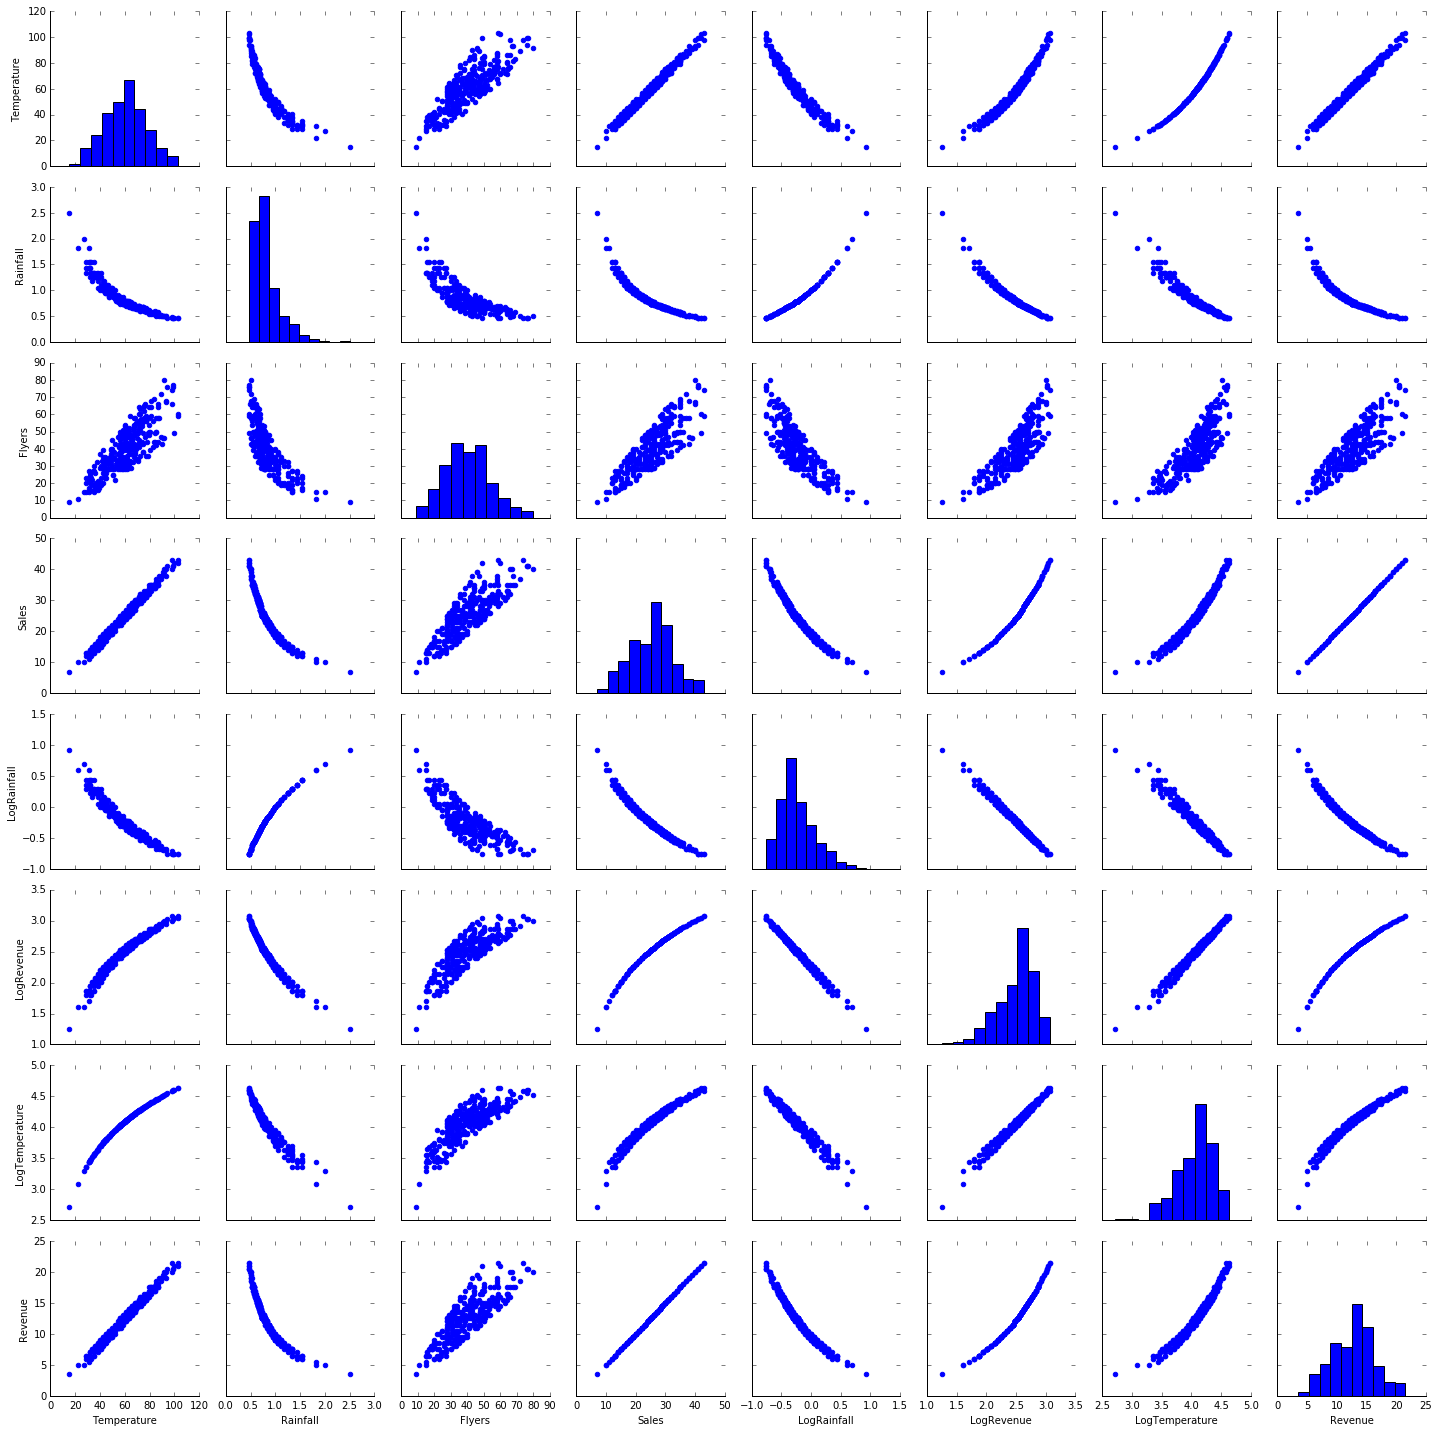

In [20]:
# This is roughly equivalent to sns.jointplot, but we see here that we have the
# flexibility to customize the type of the plots in each position.

g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

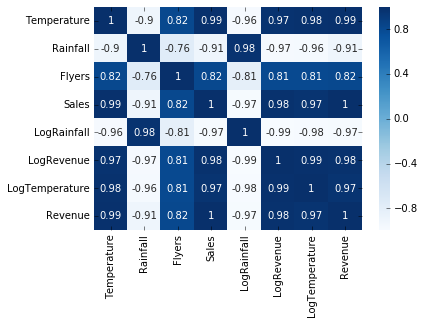

In [21]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)
